In [4]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist

In [5]:
!hostname -f

atl1-1-03-007-35-0.pace.gatech.edu


In [7]:
import tensorflow as tf
print(tf.test.is_gpu_available())
print(tf.config.list_physical_devices('GPU'))


False
[]


2023-10-06 16:13:45.382116: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1960] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...
2023-10-06 16:13:45.384096: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1960] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


In [4]:
# Initialization
def initialize_parameters(N, D, K):
    p = np.random.uniform(0, 1, size=(K, D))
    mix_pi = np.full((K, 1), 1/K)
    return p, mix_pi

In [5]:

# E-Step
def EStep(X, p, mix_pi, K):
    N = X.shape[0]
    eta = np.zeros((N, K))
    
    for i in range(N):
        for k in range(K):
            eta[i, k] = mix_pi[k] * np.prod(np.power(p[k], X[i]) * np.power(1 - p[k], 1 - X[i]))
        eta[i] = eta[i] / np.sum(eta[i])
    
    return eta

In [6]:
# M-Step
def MStep(X, eta, alpha1, alpha2, K, D):
    N = X.shape[0]
    mix_pi = np.zeros(K)
    p = np.zeros((K, D))
    
    for k in range(K):
        mix_pi[k] = np.sum(eta[:, k]) / N
        
        numerator = np.dot(eta[:, k], X) + alpha1 - 1
        denominator = np.sum(eta[:, k]) + alpha1 + alpha2 - 2
        p[k] = numerator / denominator
        
    return p, mix_pi

In [7]:
# Full EM Algorithm
def EM(X, K, iter, alpha1=1e-3, alpha2=1e-3):
    N, D = X.shape
    p, mix_pi = initialize_parameters(N, D, K)
    
    for _ in range(iter):
        eta = EStep(X, p, mix_pi, K)
        p, mix_pi = MStep(X, eta, alpha1, alpha2, K, D)
    
    return p, mix_pi

In [8]:

# Visualization
def visualize_parameters(p):
    
    K = p.shape[0]
    for k in range(K):
        plt.imshow(p[k].reshape(28, 28), cmap='gray')
        plt.show()


/tmp/ipykernel_119267/2803893214.py:9: RuntimeWarning: invalid value encountered in divide
  eta[i] = eta[i] / np.sum(eta[i])


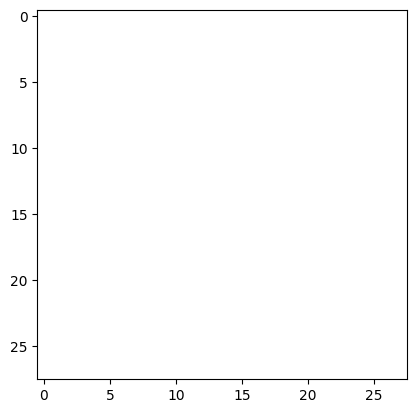

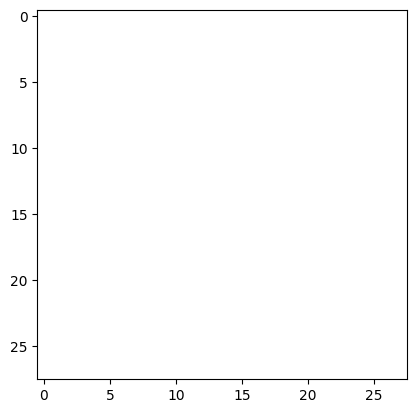

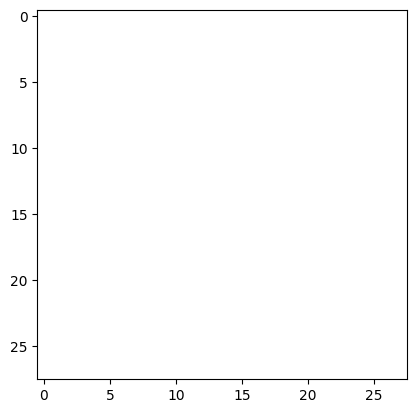

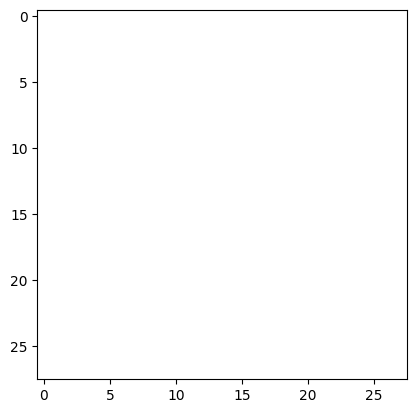

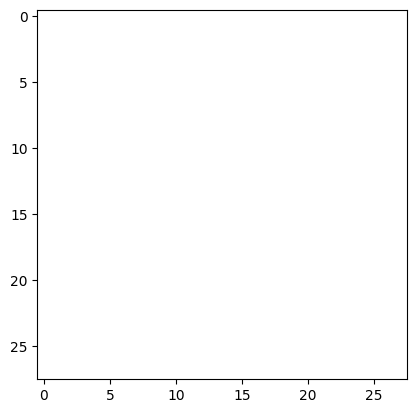

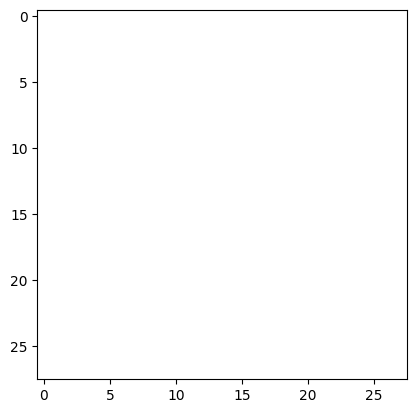

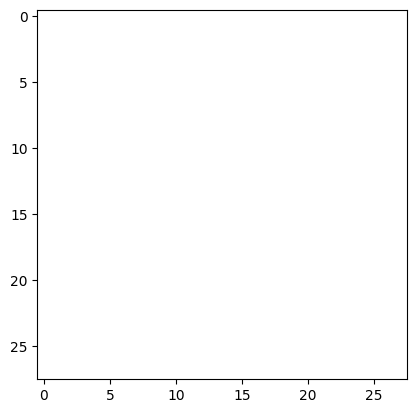

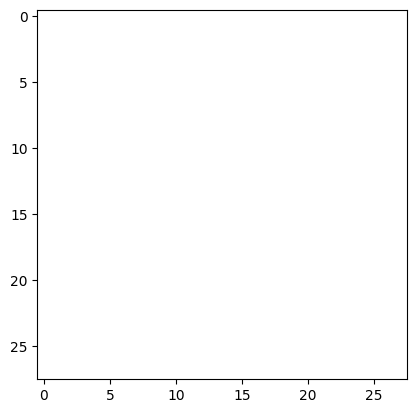

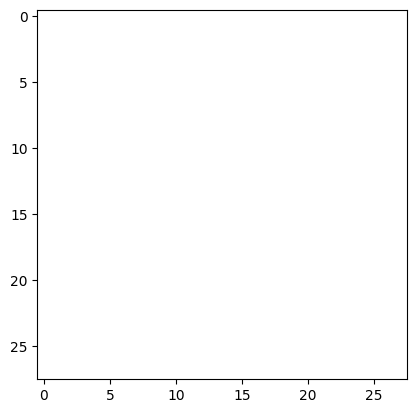

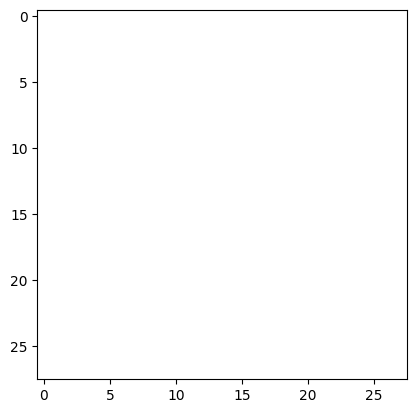

: 

In [11]:

# Load MNIST dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Preprocess the images: Flatten and binarize
flatten_images = train_images.reshape(-1, 28*28) / 255.0
binary_images = (flatten_images > 0.5).astype(np.float32)

# Sample 1000 datapoints randomly
sample_indices = np.random.choice(binary_images.shape[0], 1000, replace=False)
X = binary_images[sample_indices]

# Choose the number of clusters
K = 5  # Example: you can change this value

# Run the EM algorithm
p, mix_pi = EM(X, K, iter=20)

# Visualize the resulting Bernoulli parameters
visualize_parameters(p)